In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

/home/maryam/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
warnings.simplefilter(action='ignore')
plt.style.use('seaborn-v0_8')


In [3]:
Data = pd.read_csv('cardata.csv')
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
Data.shape

(301, 9)

In [5]:
Data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- 'Selling_Price' Column is the Target
- 'Kms_Driven' Column means Kilometers driven by the car

In [8]:
# Checking Missing Values
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## PreProcessing

In [9]:
Data['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [10]:
 np.max(Data['Year'])

np.int64(2018)

In [11]:
# Replace "Year" with "Age" to show each car’s age as of 2019

Data['Age'] = 2019 - Data['Year']
Data.drop('Year', axis=1, inplace=True)

In [12]:
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


# Type of Columns
## Categorical

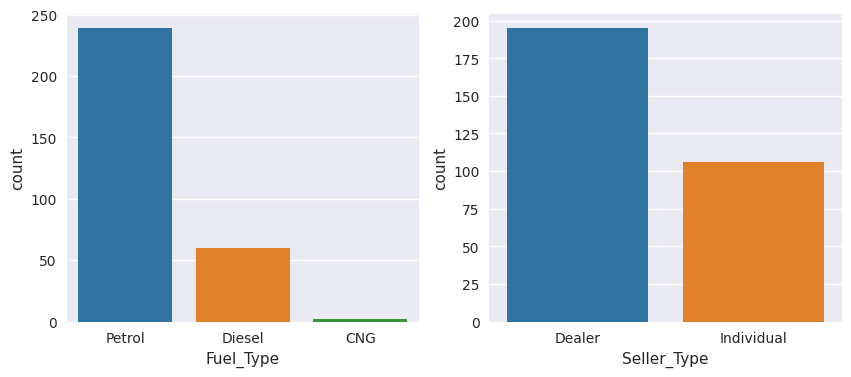

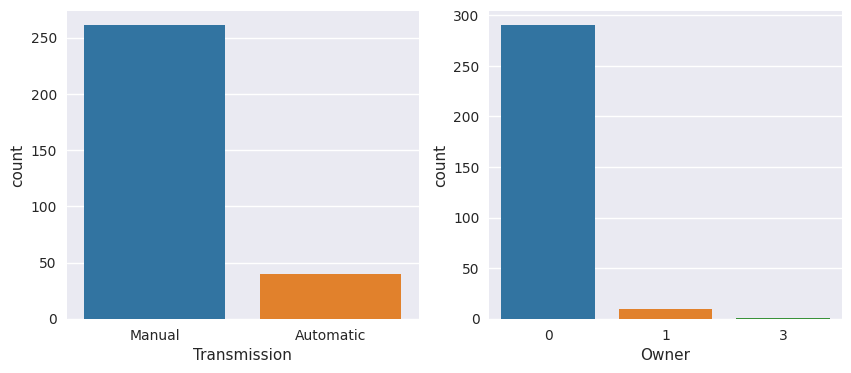

In [13]:
Categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    n_colors = Data[Categorical[i]].nunique()
    sns.countplot(x=Categorical[i], data=Data, palette=sns.color_palette("tab10", n_colors))
    i += 1
    plt.subplot(1,2,2)
    n_colors = Data[Categorical[i]].nunique()
    sns.countplot(x=Categorical[i], data=Data, palette=sns.color_palette("tab10", n_colors))
    i += 1
    plt.show()

## Numerical

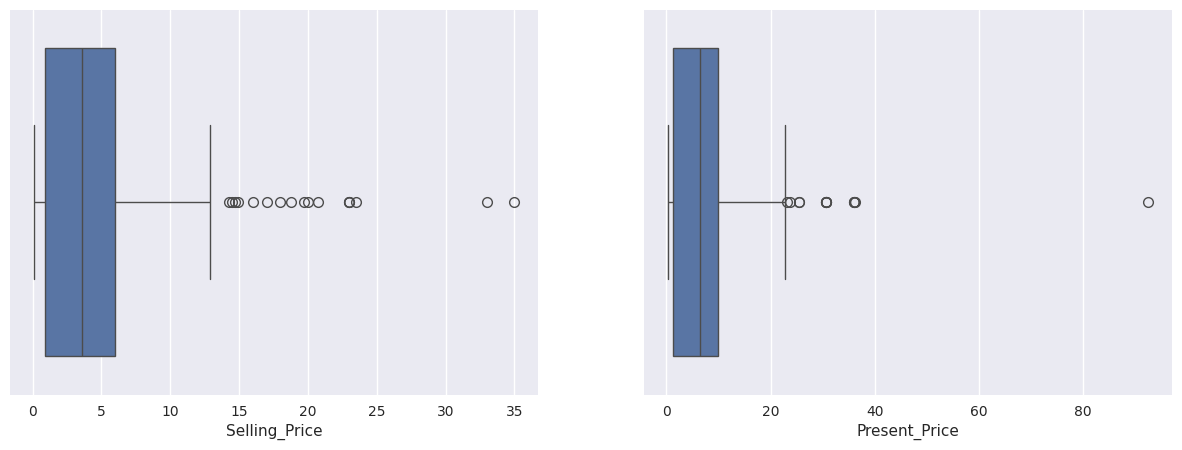

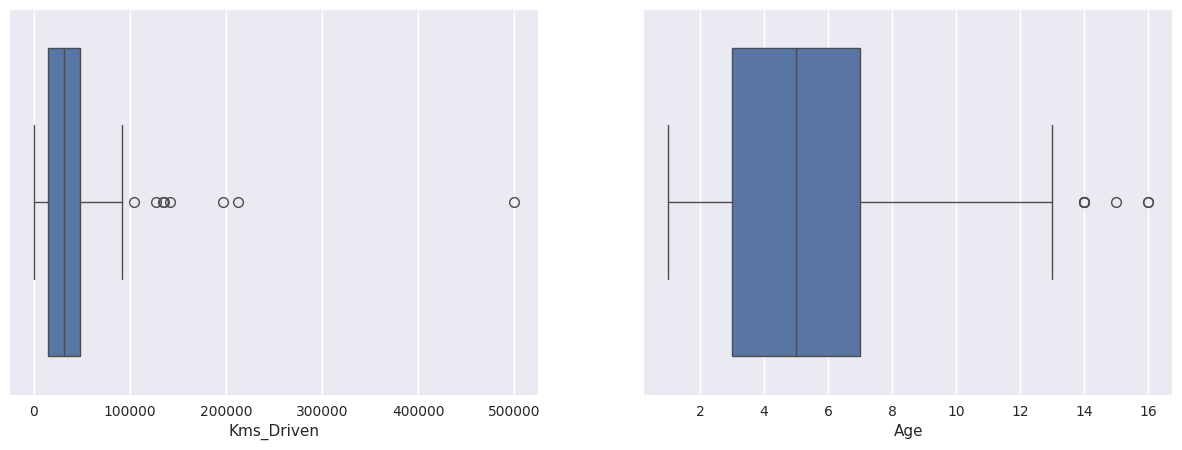

In [14]:
Numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.show()

In [15]:
# Observing Correlation for Numerical Columns

Data.corr(numeric_only=True)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [16]:
# Check the distinct values in each Categorical Column
# 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'

print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [17]:
Data["Fuel_Type"].replace({"Petrol":2, "Diesel":3, "CNG":4}, inplace=True)
Data["Seller_Type"].replace({"Dealer":2, "Individual":3}, inplace=True)
Data["Transmission"].replace({"Manual":2, "Automatic":3}, inplace=True)
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [18]:
# Delete 'Car_Name' Column to simplify the data
Data.drop(labels='Car_Name', axis=1, inplace=True)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


## Create Model

In [19]:
# Split features and target variable

X = Data.drop('Selling_Price', axis=1)
Y = Data['Selling_Price']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("Y train: ", Y_train.shape)
print("Y test: ", Y_test.shape)

X train:  (240, 7)
X test:  (61, 7)
Y train:  (240,)
Y test:  (61,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [22]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
Y_pred = Model.predict(X_test)

In [24]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score: ', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error:  1.1530045916158909
Mean Squared Error:  3.2876460857158323
Root Mean Square:  1.8131867211392854
R2 Score:  0.8484549412090382


## Imrove the Model

In [25]:
k_fold = KFold(10)
print(cross_val_score(Model, X, Y.ravel (), cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [26]:
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [27]:
len(Data)/10

30.1

In [28]:
Data1 = Data[Data.index < 120]
Data2 = Data[Data.index > 210]

Data3 = pd.concat([Data1, Data2], axis=0)
Data3.reset_index(drop=True, inplace=True)
Data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [29]:
X2 = Data3.drop('Selling_Price', axis=1)
Y2 = Data3['Selling_Price']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1)
Model2 = LinearRegression()
Model2.fit(X_train2, Y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
Y_pred2 = Model2.predict(X_test2)

In [31]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test2, Y_pred2))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test2, Y_pred2))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))
print('R2 Score: ', metrics.r2_score(Y_test2, Y_pred2))

Mean Absolute Error:  1.2344068697754234
Mean Squared Error:  2.623898258077038
Root Mean Square:  1.619845133979492
R2 Score:  0.8793462370195003


#### R2 Score(2) = 0.88 > R2 Score(1) = 0.84

In [32]:
print("Model Intercept =", Model2.intercept_)
print("Model Coefs =", Model.coef_)

Model Intercept = -1.6962350442029441
Model Coefs = [ 4.41987483e-01 -4.82835255e-06  1.54833224e+00 -1.20366204e+00
  1.86575915e+00  3.87178280e-01 -4.23406978e-01]


In [33]:
Y_pred2 = Model2.predict([[11.23, 42000, 1, 4, 6, 1,10]])
Y_pred2

array([6.23558857])

### with a simple Linear Regression Model for a car with these feautures:
- Present price = 11.23
- Kms driven = 42000
- Fuel type = Petrol
- Seller type = Dealer
- Transmission = Manual
- Owner = 1
- Age = 10
### the predicted price is 6.23

## Now let's create a better Model

### Check Noises in Categorical Columns

In [34]:
print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


### There no Noise here!

### Check Noises in Numerical Columns

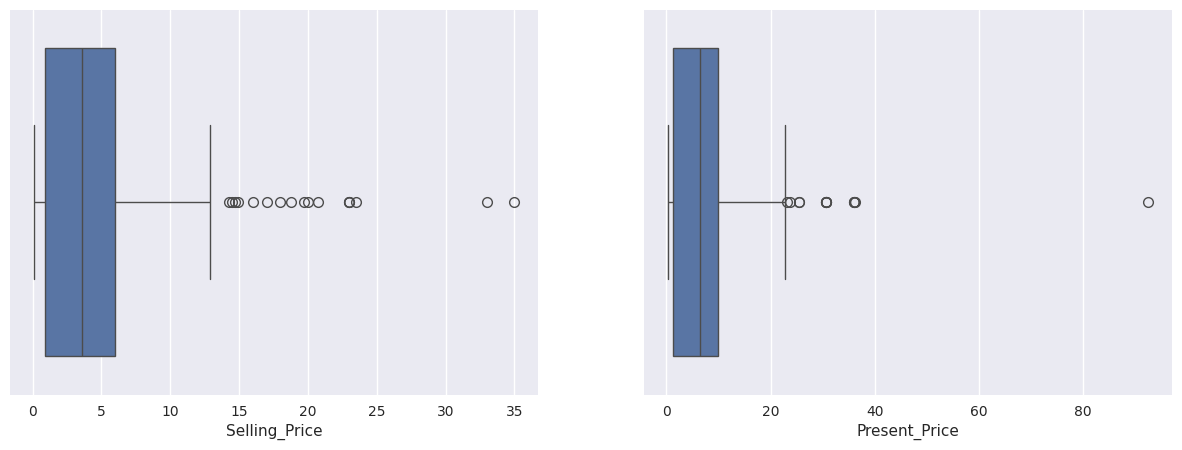

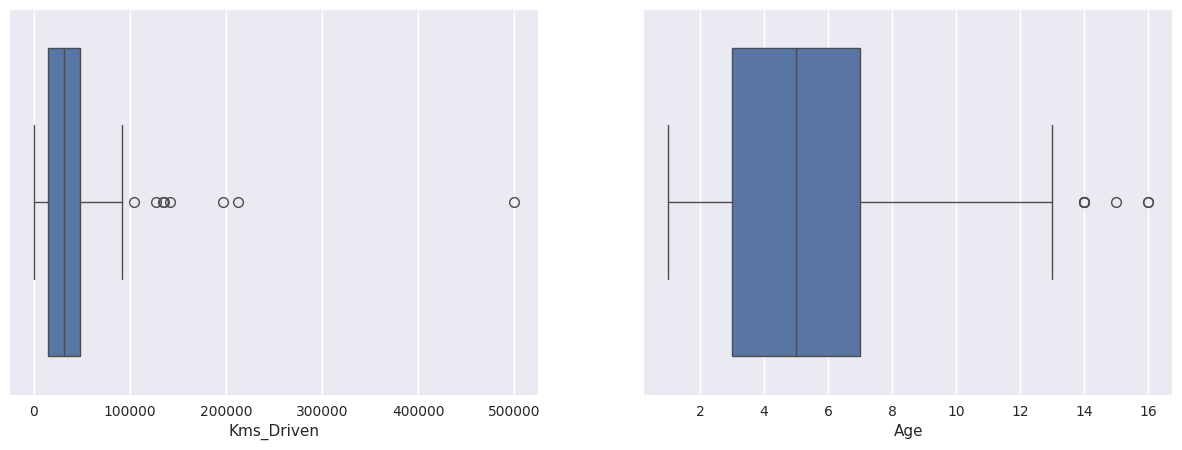

In [35]:
Numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.show()

- Selling price < 30
- Present price < 80
- Kms driven < 400000
- No Noise in Numerical columns!

## Let's create a new Model

### Simple one:

In [36]:
X = pd.DataFrame(Data, columns = ['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'])
Y = Data.Selling_Price.values.reshape(-1,1)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [38]:
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score: ', r2)

Mean Absolute Error:  1.0000326012144771
Mean Squared Error:  2.1885564456572273
Root Mean Square:  1.4793770464818046
R2 Score:  0.9134181721224689


#### Could it be better?
#### Let's try!
#### make features Non-Linear
#### Dimension = X^2

In [39]:
# function for checking r2 for new dimension

def check (Dimension, testsize):
    r2 = 0.913418172122469
    for column in X:
        New_Col_Name = column + str(Dimension)
        New_Col_Val = X[column]**Dimension
        X.insert(0, New_Col_Name, New_Col_Val)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testsize, random_state = 0)
        New_Model = LinearRegression()
        New_Model.fit(X_train, Y_train)
        Y_pred = New_Model.predict(X_test)
        r2_New = metrics.r2_score(Y_test, Y_pred)
        if r2_New < r2:
            X.drop([New_Col_Name], axis = 1, inplace = True)
        else:
            r2 = r2_New
    print('R2 Score: ', r2)



check(2,0.2)

R2 Score:  0.9311515410545033


### R2 Score is raised +2%

In [40]:
#observing X to see which features have most impact for X^2 (Owner, Fuel_Type, Kms_Driven, Present_Price)
X

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


### Let's try another way: Dot Product features

In [41]:
Pres_Kms = X["Present_Price"] *X["Kms_Driven"]
Pres_Kms2 = X["Present_Price"] *X["Kms_Driven2"]
Pres_Fuel = X["Present_Price"] *X["Fuel_Type"]
Pres_Fuel2 = X["Present_Price"] *X["Fuel_Type2"]
Pres2_Kms = X["Present_Price2"] *X["Kms_Driven"]
Pres2_Kms2 = X["Present_Price2"] *X["Kms_Driven2"]
Pres2_Fuel = X["Present_Price2"] *X["Fuel_Type"]
Pres2_Fuel2 = X["Present_Price2"] *X["Fuel_Type2"]

In [42]:
X.insert(0, "Pres_Kms", Pres_Kms)
X.insert(0, "Pres_Kms2", Pres_Kms2)
X.insert(0, "Pres_Fuel", Pres_Fuel)
X.insert(0, "Pres_Fuel2", Pres_Fuel2)
X.insert(0, "Pres2_Kms", Pres2_Kms)
X.insert(0, "Pres2_Kms2", Pres2_Kms2)
X.insert(0, "Pres2_Fuel", Pres2_Fuel)
X.insert(0, "Pres2_Fuel2", Pres2_Fuel2)
X

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [44]:
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score: ', r2)

Mean Absolute Error:  0.6706552133513252
Mean Squared Error:  1.066960771702293
Root Mean Square:  1.0329379321635415
R2 Score:  0.9577897960681274


#### Now in this model R2 Score is 0.95

### Let's try K-Fold

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5)
results = (cross_val_score(model, X, Y, cv = k_fold, n_jobs = -1))
print(results)
print(np.mean(results))

/home/maryam/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/maryam/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/maryam/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to t

[  0.91790674   0.70797398 -21.91614748   0.66714707   0.88557332]
-3.7475092726038186


Third Fold is bad in training!!

In [46]:
X.shape

(301, 19)

In [47]:
301/6

50.166666666666664

In [48]:
# remove the third fold for X
df = X[X.index < 100]
df2 = X[X.index > 151]

# Combine the two slices
X_new = pd.concat([df, df2], ignore_index=True)
X_new


,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [49]:
# remove the third fold for Y
Y = Data['Selling_Price']
Y1 = Y[Y.index < 100]
Y2 = Y[Y.index > 151]

# Combine the slices
Y_new = pd.concat([Y1, Y2], ignore_index=True)

Y_new.shape


(249,)

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2, random_state = 0)
model = LinearRegression ()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6596338370283202
Mean Squared Error: 0.8188208702230909
Root Mean Squared Error: 0.9048872140897399
R2 Score: 0.977722704575322


#### R2 Score is almost 98% !

Normalization

In [51]:
from sklearn import preprocessing
print(X_new[0:5000])
X_new.insert(0, "Target", Y_new)
DataFrame = X_new
DataFrame
Scaler = preprocessing.StandardScaler().fit(DataFrame)
Norm = Scaler.transform(DataFrame.astype(float))
print(Norm[0:5])

     Pres2_Fuel2  Pres2_Fuel    Pres2_Kms2     Pres2_Kms  Pres_Fuel2  \
0       124.9924     62.4962  2.277986e+10  8.436987e+05       22.36   
1       819.1044    273.0348  1.682804e+11  3.913499e+06       85.86   
2       388.0900    194.0450  4.619241e+09  6.694552e+05       39.40   
3        68.8900     34.4450  4.656964e+08  8.955700e+04       16.60   
4       424.7721    141.5907  8.504893e+10  2.003508e+06       61.83   
..           ...         ...           ...           ...         ...   
244    1211.0400    403.6800  1.554416e+11  4.573425e+06      104.40   
245     139.2400     69.6200  1.253160e+11  2.088600e+06       23.60   
246     484.0000    242.0000  9.356190e+11  1.064001e+07       44.00   
247    1406.2500    468.7500  1.265625e+10  1.406250e+06      112.50   
248     139.2400     69.6200  1.039263e+09  1.902018e+05       23.60   

     Pres_Fuel     Pres_Kms2  Pres_Kms  Owner2  Fuel_Type2  Kms_Driven2  \
0        11.18  4.075110e+09  150930.0       0           4  

In [52]:
X_norm = DataFrame.drop(["Target"], axis = 1)
Y_norm = DataFrame["Target"].values.reshape(-1,1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size = 0.2, random_state = 0)
model = LinearRegression ()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6596338370283202
Mean Squared Error: 0.8188208702230909
Root Mean Squared Error: 0.9048872140897399
R2 Score: 0.977722704575322


same R2 Score as K-Fold

## Visualization of Model

In [54]:
X_new.drop(["Target"], axis = 1, inplace = True)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2, random_state = 0)
model = LinearRegression ()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6596338370283202
Mean Squared Error: 0.8188208702230909
Root Mean Squared Error: 0.9048872140897399
R2 Score: 0.977722704575322


In [56]:
X_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [57]:
X_test.insert(0, "Y_test", Y_test)
X_test.insert(0, "Y_pred", Y_pred)
X_test

,Y_pred,Y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.073951,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.899990,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.307305,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.225257,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.444216,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.846904,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.405217,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.429188,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.814694,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.982099,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [58]:
New_df = X_test.sort_values(by = 'Present_Price')

In [59]:
a = New_df.Present_Price
b = New_df.Y_test
c = New_df.Present_Price
d = New_df.Y_pred

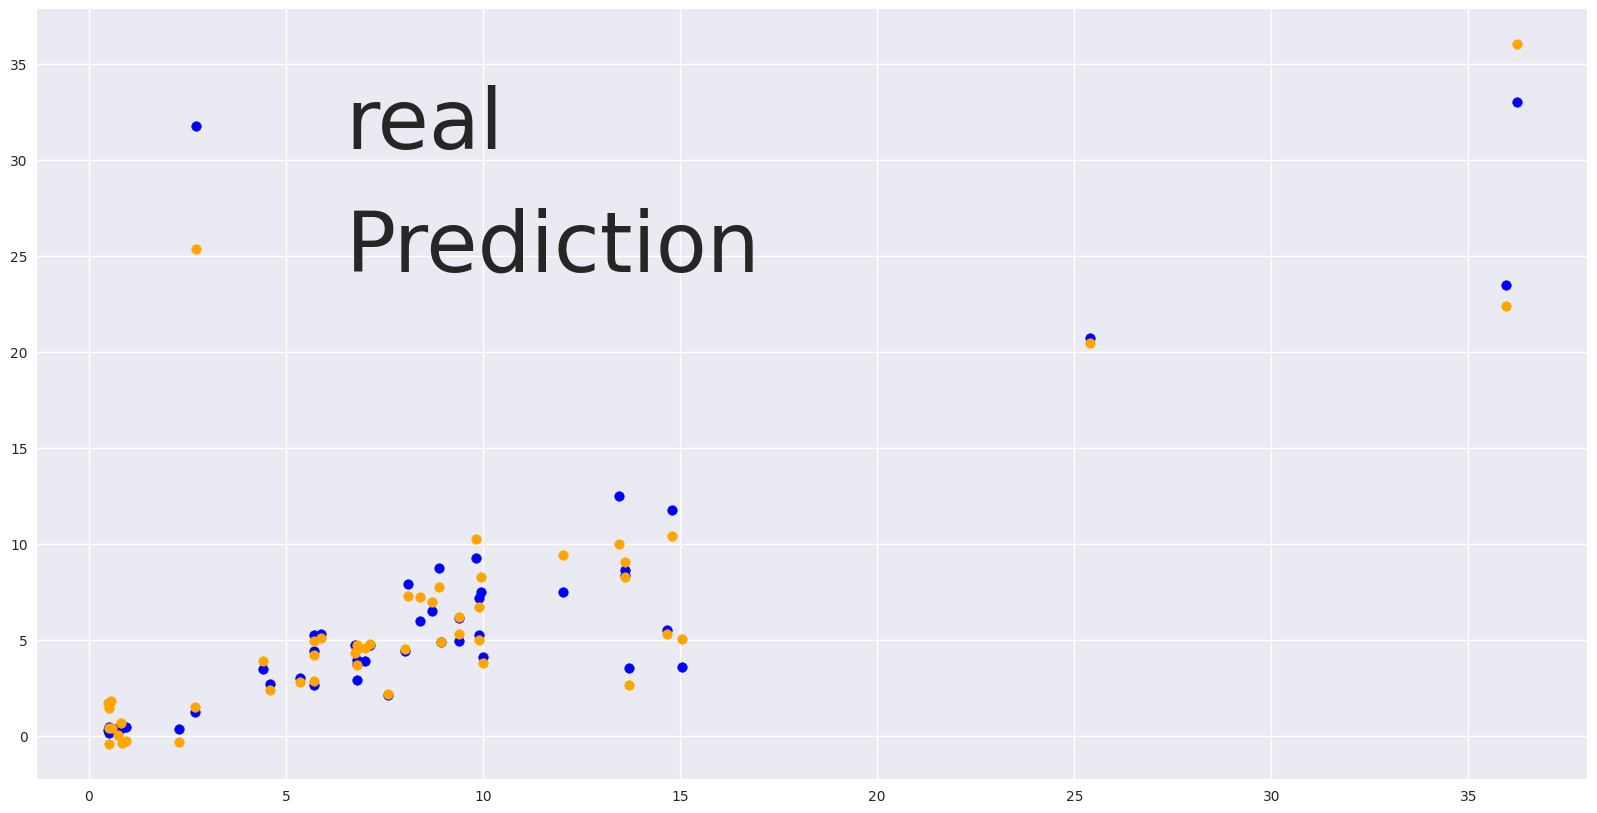

In [60]:
plt.figure(figsize = (20, 10))
plt.scatter(a, b, color = 'blue', label = "real")
plt.scatter(c, d, color = 'orange', label = "Prediction")
plt.legend(fontsize = 60)
plt.show()

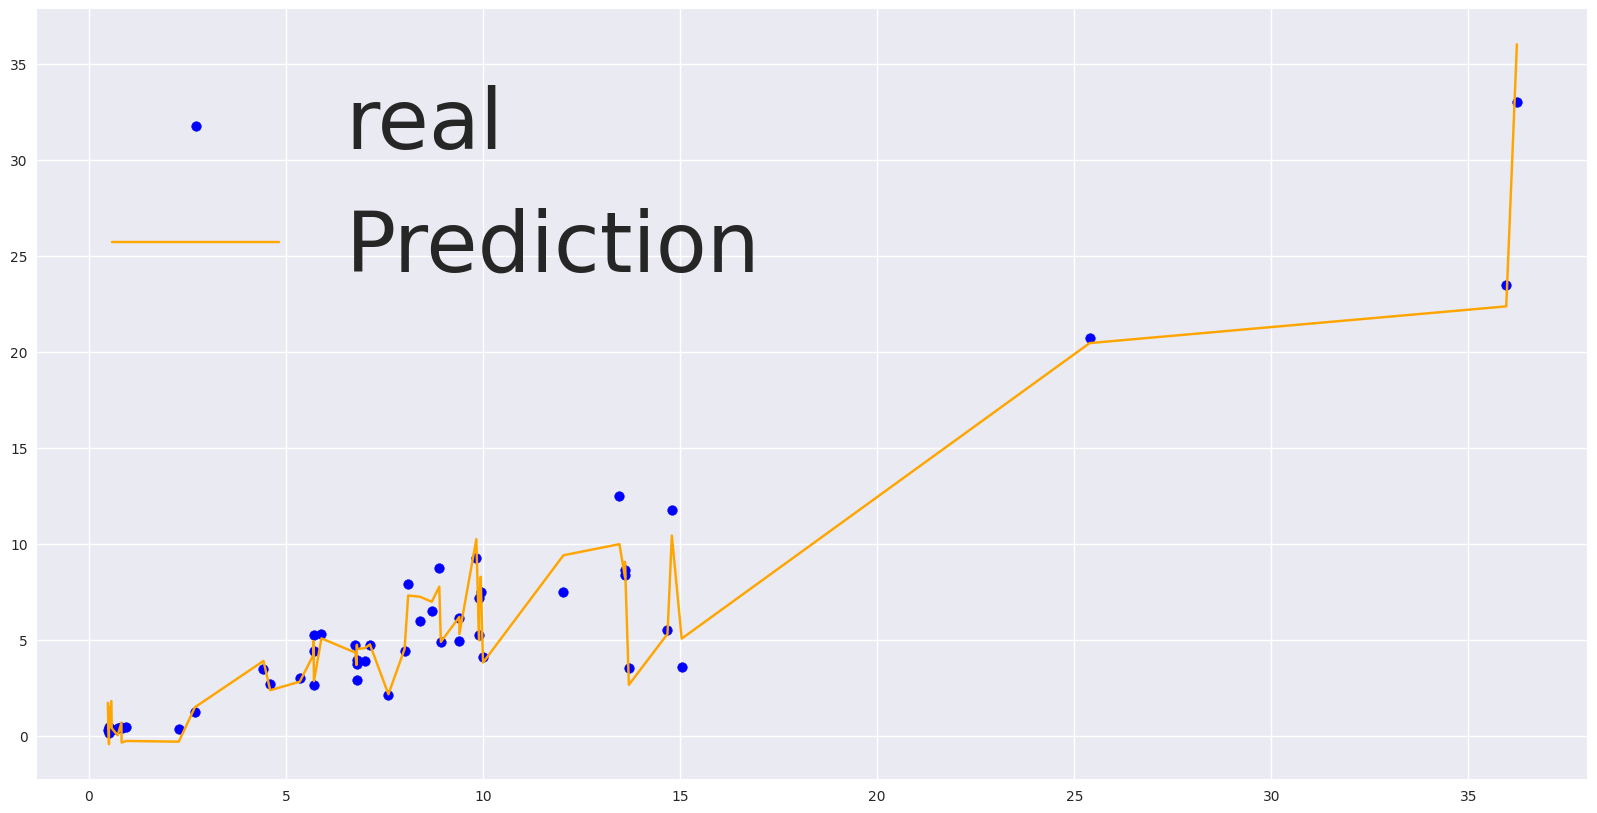

In [61]:
plt.figure(figsize = (20, 10))
plt.scatter(a, b, color = 'blue', label = "real")
plt.plot(c, d, color = 'orange', label = "Prediction")
plt.legend(fontsize = 60)
plt.show()

## Example of prediction in this data based on this Model:
### Predict the cost of a given car with these features:

##### Present Price = 11.23
##### Kms Driven = 42.000
##### Fuel Type = Petrol
##### Seller Type = Dealer
##### Transmission = Manunal
##### Owner = 1
##### Age = 10

In [62]:
DataFrame.insert(0, "Target", Y_new)

In [63]:
DataFrame.columns

Index(['Target', 'Pres2_Fuel2', 'Pres2_Fuel', 'Pres2_Kms2', 'Pres2_Kms',
       'Pres_Fuel2', 'Pres_Fuel', 'Pres_Kms2', 'Pres_Kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

New Data

In [64]:
# features of the given car

Present_Price = 11.23
KMS_driven = 42000
Fuel_Type = 2 #Petrol
Seller_Type = 2 #Dealer
Transmission = 2 #Manual
Owner = 1
Age = 10

Model_Input = pd.DataFrame ({'Target': 10,
                             'Pres2_Fuel2': [((Present_Price**2)*(Fuel_Type**2))],
                             'Pres2_Fuel': [((Present_Price**2)*(Fuel_Type))],
                             'Pres2_Kms2': [((Present_Price**2)*(KMS_driven**2))],
                             'Pres2_Kms': [((Present_Price**2)*(KMS_driven))],
                             'Pres_Fuel2': [((Present_Price)*(Fuel_Type**2))],
                             'Pres_Fuel': [((Present_Price)*(Fuel_Type))],
                             'Pres_Kms2': [((Present_Price)*(KMS_driven**2))],
                             'Pres_Kms': [((Present_Price)*(KMS_driven))],
                             'Owner2': [Owner**2],
                             'Fuel_Type2': [Fuel_Type**2],
                             'Kms_Driven2': [KMS_driven**2],
                             'Present_Price2': [Present_Price**2],
                             'Present_Price': [Present_Price],
                             'Kms_Driven': [KMS_driven],
                             'Fuel_Type': [Fuel_Type],
                             'Seller_Type': [Seller_Type],
                             'Transmission': [Transmission],
                             'Owner': [Owner],
                             'Age': [Age]})

In [65]:
Model_Input

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [66]:
Finall = pd.concat([DataFrame, Model_Input], ignore_index=True)
Finall

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [67]:
X = Finall.drop(["Target"], axis = 1)[:249]
Y =Finall[["Target"]][:249]
X_Finall = Finall.drop(["Target"], axis = 1)[249:]

In [68]:
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
Y_pred = model.predict(X_Finall)

In [70]:
Y_pred

array([[4.80012709]])

### Predicted Price is 4.80
